<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Decision-Tree-and-Random-Forest-Models" data-toc-modified-id="Decision-Tree-and-Random-Forest-Models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Decision Tree and Random Forest Models</a></span><ul class="toc-item"><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Simple-example" data-toc-modified-id="Simple-example-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Simple example</a></span></li><li><span><a href="#Decision-tree-example-with-real-data" data-toc-modified-id="Decision-tree-example-with-real-data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Decision tree example with real data</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Feature importance</a></span></li></ul></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Random Forests</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-for-Cancer-Data" data-toc-modified-id="Random-Forest-for-Cancer-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Random Forest for Cancer Data</a></span></li><li><span><a href="#Random-Forest-for-Digits-Data" data-toc-modified-id="Random-Forest-for-Digits-Data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Random Forest for Digits Data</a></span></li></ul></li></ul></li></ul></div>

## Decision Tree and Random Forest Models

### Decision Trees

A further important model category. The basic principle is easy to understand:  
 Hierarchical series of  **if/else questions** 

*Example:* Game where you need to distinguish four kinds of animals:  
* *Bear, Dolphin, Penguin, Hawk*

Goal is to use as few questions as possible.

One possible solution:

![](figures/DT_animals.png)

#### Simple example 
Illustrate DT with half-moon data, a simple dataset with half-moon shaped data distributions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_moons


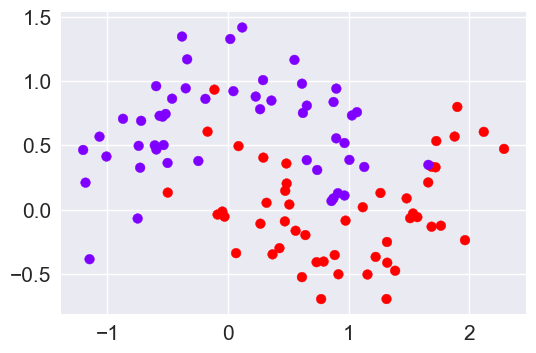

In [12]:
# create and plot dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.figure()

plt.scatter(X[:, 0], X[:, 1], c=y,cmap='rainbow');


In [8]:
# run DT
max_depth=3
model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
tree=model.fit(X,y)
tree.score(X,y)

0.92000000000000004

In [4]:
# helper function to visualize DT
#
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Depth, score:  9 1.0


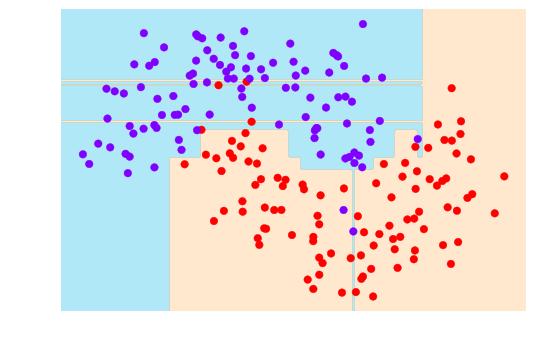

In [11]:
# run DT with varying depth and visualize limits
max_depth=9
model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
tree=model.fit(X,y)
print ('Depth, score: ', max_depth, tree.score(X,y))
visualize_classifier(model, X, y)

For high depth, clearly goes into over-training
***

** Decision Trees** work well in principle, however, they are rather sensitive to over-training  
&rarr; Validation curve left for exercises

***
#### Decision tree example with real data

A frequently used data set for ML is a data set for *breast cancer diagnosis*

In [14]:
# load dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print (cancer.feature_names)
print (cancer.DESCR)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius length

In [39]:
# apply decision-tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Without limiting the depth, the DT will be evolved until perfect accuracy.

But not really useful &rarr; Over-training

Better approach:

In [40]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


***
#### Feature importance

A very useful additional feature of DT classification is the *feature importance*.
This gives for each feature a rating between 0 and 1 how important it is for the classification:
* 0 means no effect, not useful
* 1 means perfect separation



In [41]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


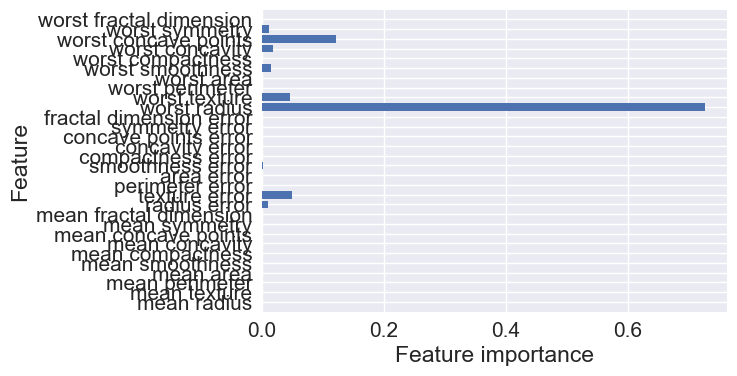

In [42]:
# better to visualize
def plot_feature_importance( model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features);

    
plot_feature_importance( tree )

Clearly shows that feature ` ẁorst radius` has largest impact.

### Random Forests

Decisions tress are potentially very powerful models but they are very also sensitive to over-training, therefore they are normally not directly used in practice. 

However, one can mitigate or solve this problem by using an ensemble of decision trees and not just a single DT.  
The main trick is randomization:
* train many DT but
* each DT sees different parts of the data
* or different set of features

This approach is called **Random Forest**:  
Many randomized trees contribute and the final decision is made by some sort of majority voting.
***

Test with half moon data using 5 DTs:

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
# random forest with 5 DT
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 0.973
Accuracy on test set: 0.960


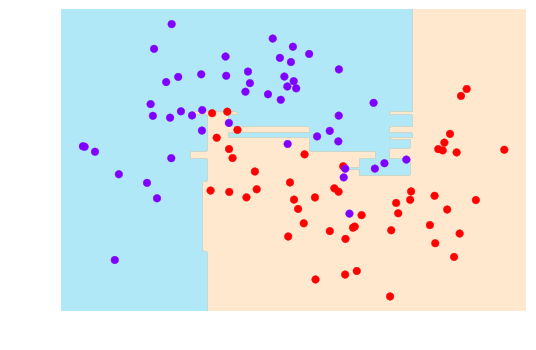

In [37]:
visualize_classifier(forest, X, y)

Effectively, boundaries are more complex
***

#### Random Forest for Cancer Data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Much better accuracy on validation set

**Feature importance** also instructive:

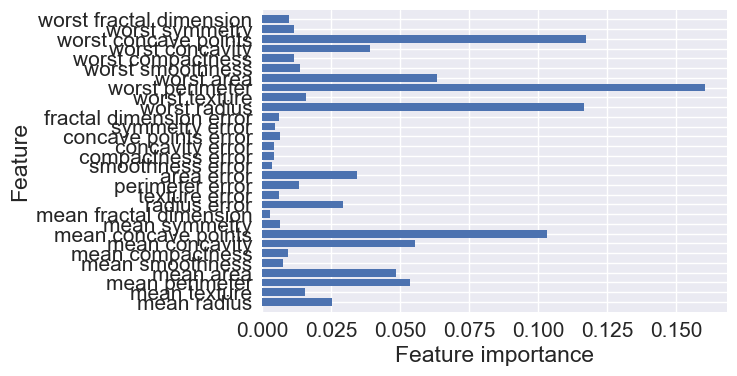

In [43]:
plot_feature_importance(forest)

* many more features contribute
* `worst radius` feature no longer dominant

&rarr; Random Forests much better in classification and better exploit information of features 

Main drawback: Decision process rather in-transparent, when compared to direct DT .

An alternative to Random Forests are **Boosted** Decision Trees  
&rarr; literature


***

#### Random Forest for Digits Data

Come back to example of digit classification and apply RandomForest to it:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['DESCR', 'target_names', 'images', 'data', 'target'])

In [3]:
# apply RFC to digit data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

***
**Evaluate model**

In [4]:
print("Accuracy on training set: {:.3f}".format(model.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(model.score(Xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.978


In [5]:
from sklearn import metrics
print(metrics.classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        37
          1       0.98      1.00      0.99        43
          2       1.00      0.95      0.98        44
          3       0.94      0.98      0.96        45
          4       1.00      0.97      0.99        38
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       0.96      1.00      0.98        48
          8       0.98      0.92      0.95        48
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



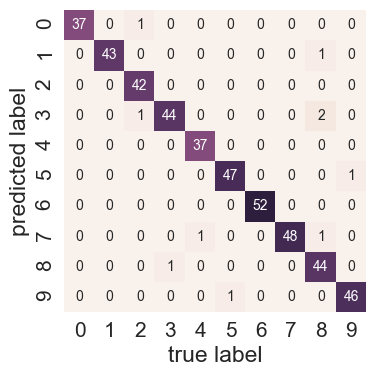

In [6]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

***
**Excellent performance of Random Forest!**